General idea is to use unsupervised segmentation to locate coral.  then draw a 224x224 pix box around the segment centroid.  eventually use classifer's model to determine the coral type in the 224x224 image

In [5]:
from skimage.segmentation import slic, felzenszwalb
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from skimage.measure import regionprops

import matplotlib.pyplot as plt
import argparse
import os
import random
import glob
import numpy as np

In [2]:
image_file_and_path = 'ref/coral2.jpg'

In [7]:
if os.environ.get("USER") == 'Mark':
    image_path = '/Users/Mark/fruitpunch/coral_detection/data/'
    imgs = glob.glob(image_path + '*.jpg')

image_file_and_path = random.choice(imgs)
print(image_file_and_path)

/Users/Mark/fruitpunch/coral_detection/data/15026109202.jpg


In [8]:
image = img_as_float(io.imread(image_file_and_path))
print(image.shape)

(1031, 1031, 3)


<ipython-input-9-e69125ef8e56>:9: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(image, n_segments = n_segments, sigma = 5, compactness=20)


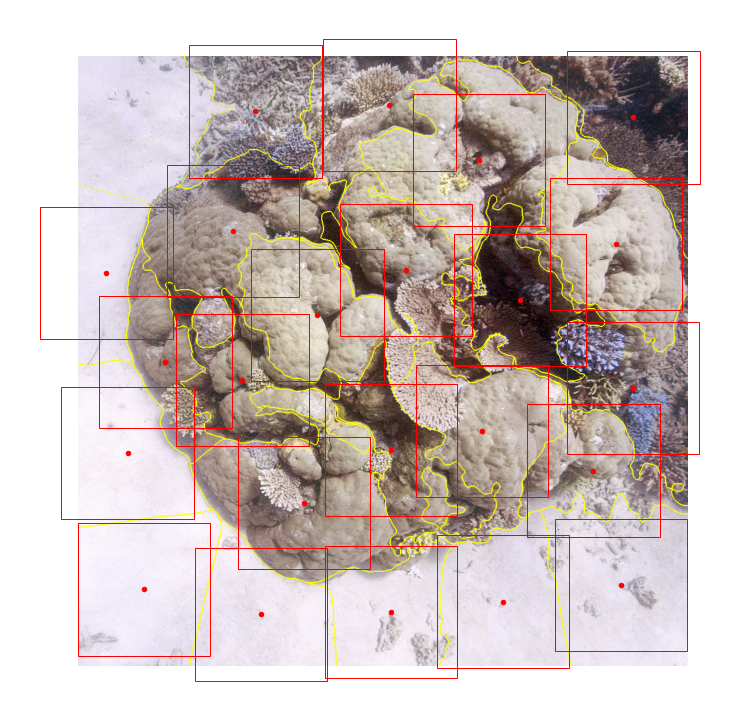

In [9]:
import matplotlib.patches as patches

# apply SLIC and extract (approximately) the supplied number
# of segments

n_segments = 30

#segments = felzenszwalb(image, scale=500, sigma=numSegments, min_size=500)
segments = slic(image, n_segments = n_segments, sigma = 5, compactness=20)
regions = regionprops(segments)
numSegments = len(regions)

#initialize array to hold segment centroids
xs=[]
ys=[]

fig = plt.figure("Superpixels -- %d segments" % (numSegments), figsize=(13,13))
ax = fig.add_subplot(1, 1, 1)

# plot segment boundaries
ax.imshow(mark_boundaries(image, segments))


# plot segment centroids
for i, props in enumerate(regions):
    y, x = props.centroid  # centroid coordinates
    xs.append(x)
    ys.append(y)

    # plot 224x224 boxes
    rect = patches.Rectangle((xs[i]-224/2, ys[i]-224/2), 224, 224, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
ax.scatter(x=xs, y=ys, c='r', s=20)


plt.axis("off")
plt.show()